In [2]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
from utils_qm import save_obj, load_obj


### All learning curves for atomisation energy

In [2]:
at_ae = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/opt_sigma_all_atomic_atomisation.txt')
at_ae_per_mol = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/opt_sigma_all_atomic_atomisation_per_molecule.txt')
at_ae_per_mol_el = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_per_molecule.txt')

fchl_at_ae = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/fchl/lcurve_atomic_fchl.txt')
fchl_at_ae_per_mol = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/fchl/lcurve_mol_fchl.txt')

mol_ae_global = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/learning_curve_global_label.txt')

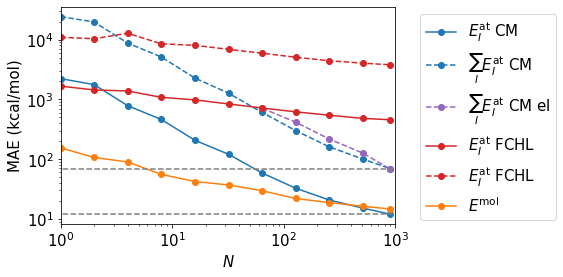

In [3]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,1)

ax.plot(at_ae[:,0], at_ae[:,1]*627.5, '-o', label = r'$E_I^{\rm at}$ CM', color = 'tab:blue')
ax.plot(at_ae_per_mol[:,0], at_ae_per_mol[:,1]*627.5, '--o', label = r'$\sum_I E_I^{\rm at}$ CM', color = 'tab:blue')
ax.plot(at_ae_per_mol_el[:,0], at_ae_per_mol_el[:,1]*627.5, '--o', label = r'$\sum_I E_I^{\rm at}$ CM el', color = 'tab:purple')

ax.plot(fchl_at_ae[:,0], fchl_at_ae[:,1]*627.5, '-o', label = r'$E_I^{\rm at}$ FCHL', color = 'tab:red')
ax.plot(fchl_at_ae_per_mol[:,0], fchl_at_ae_per_mol[:,1]*627.5, '--o', label = r'$E_I^{\rm at}$ FCHL', color = 'tab:red')

ax.plot(mol_ae_global[:,0], mol_ae_global[:,1]*627.5, '-o',label = r'$E^{\rm mol} $', color = 'tab:orange')

hor_bar = np.full(2,fill_value=np.amin(at_ae[:,1]*627.5))
hor_bar_tot = np.full(2,fill_value=np.amin(at_ae_per_mol[:,1]*627.5))

hor_bar_x = np.array([ 0, 1200])
ax.plot(hor_bar_x, hor_bar, '--', color='tab:grey')
ax.plot(hor_bar_x, hor_bar_tot, '--', color='tab:grey')

ax.set_xlim(1, 1000)
ax.set_xlabel(r'$N$')
ax.set_ylabel('MAE (kcal/mol)')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([ np.amin(at_ae[:,0]), np.amax(at_ae[:,0])])
ax.legend(bbox_to_anchor=(1.05,1.0))
#ax.legend()
#plt.savefig('/home/misa/projects/Atomic-Energies/figures/machine_learning/learning_curves/lcurves_atomisation_all.png', bbox_inches='tight')

### Learning different properties

In [2]:
cm_alchpot = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/performance_different_labels/cm_alchpot.txt')
cm_atomic = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/performance_different_labels/cm_atomic.txt')
cm_atomisation = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/performance_different_labels/cm_atomisation.txt')

fchl_alchpot = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/performance_different_labels/fchl_alchpot.txt')
fchl_atomic = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/performance_different_labels/fchl_atomic.txt')
fchl_atomisation = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/performance_different_labels/fchl_atomisation.txt')

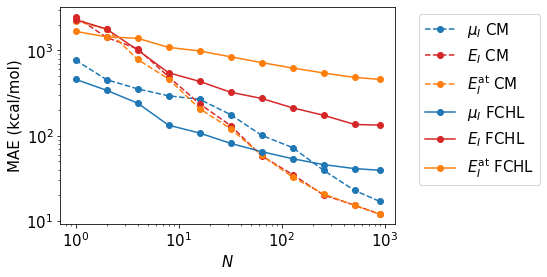

In [6]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,1)

ax.plot(cm_alchpot[:,0], cm_alchpot[:,1]*627.5, '--o', label = r'$\mu_I$ CM', color = 'tab:blue')
ax.plot(cm_atomic[:,0], cm_atomic[:,1]*627.5, '--o', label = r'$E_I$ CM', color = 'tab:red')
ax.plot(cm_atomisation[:,0], cm_atomisation[:,1]*627.5, '--o', label = r'$E_I^{\rm at}$ CM', color = 'tab:orange')

ax.plot(fchl_alchpot[:,0], fchl_alchpot[:,1]*627.5, '-o', label = r'$\mu_I$ FCHL', color = 'tab:blue')
ax.plot(fchl_atomic[:,0], fchl_atomic[:,1]*627.5, '-o', label = r'$E_I$ FCHL', color = 'tab:red')
ax.plot(fchl_atomisation[:,0], fchl_atomisation[:,1]*627.5, '-o', label = r'$E_I^{\rm at}$ FCHL', color = 'tab:orange')

ax.set_xlabel(r'$N$')
ax.set_ylabel('MAE (kcal/mol)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05,1.0))
plt.savefig('/home/misa/projects/Atomic-Energies/figures/machine_learning/learning_curves/compare_diff_properties_cm_fchl.png', bbox_inches='tight')

### Why does elementwise splitting not help?

In [19]:
at_ae = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/opt_sigma_all_atomic_atomisation.txt')
at_ae_per_mol = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/opt_sigma_all_atomic_atomisation_per_molecule.txt')

at_ae_H = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_1.0.txt')
at_ae_C = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_6.0.txt')
at_ae_N = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_7.0.txt')
at_ae_O = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_8.0.txt')
at_ae_per_mol_el = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_per_molecule.txt')


at_ae_H2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_H_b2.txt')
at_ae_C2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_C_b2.txt')
at_ae_N2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_N_b2.txt')
at_ae_O2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_O_b2.txt')

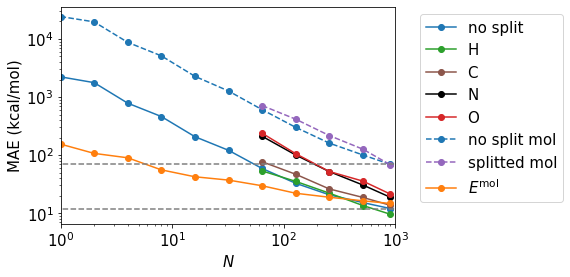

In [36]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,1)

ax.plot(at_ae[:,0], at_ae[:,1]*627.5, '-o', label = r'no split', color = 'tab:blue')
ax.plot(at_ae_H[:,0], at_ae_H[:,1]*627.5, '-o', label ='H', color='tab:green')
ax.plot(at_ae_C[:,0], at_ae_C[:,1]*627.5, '-o', label ='C', color = 'tab:brown')
ax.plot(at_ae_N[:,0], at_ae_N[:,1]*627.5, '-o', label ='N', color = 'black')
ax.plot(at_ae_O[:,0], at_ae_O[:,1]*627.5, '-o', label ='O', color = 'tab:red')

ax.plot(at_ae_per_mol[:,0], at_ae_per_mol[:,1]*627.5, '--o', label = r'no split mol', color = 'tab:blue')
ax.plot(at_ae_per_mol_el[:,0], at_ae_per_mol_el[:,1]*627.5, '--o', label ='splitted mol', color = 'tab:purple')
ax.plot(mol_ae_global[:,0], mol_ae_global[:,1]*627.5, '-o',label = r'$E^{\rm mol} $', color = 'tab:orange')

hor_bar = np.full(2,fill_value=np.amin(at_ae[:,1]*627.5))
hor_bar_tot = np.full(2,fill_value=np.amin(at_ae_per_mol[:,1]*627.5))

hor_bar_x = np.array([ 0, 1200])
ax.plot(hor_bar_x, hor_bar, '--', color='tab:grey')
ax.plot(hor_bar_x, hor_bar_tot, '--', color='tab:grey')

ax.set_xlim(1, 1000)
ax.set_xlabel(r'$N$')
ax.set_ylabel('MAE (kcal/mol)')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([ np.amin(at_ae[:,0]), np.amax(at_ae[:,0])])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('/home/misa/projects/phd_symposium_2021/figures/lcurves_atomisation_comparison_elementwise.png', bbox_inches='tight')

## $\Delta$-Learning

In [3]:

cm_atomic = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomic/delta_learning/best_no_baseline.txt')

#mean_en = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomic/delta_learning/mean_energy_element/best.txt', skiprows=2)
#mean_en2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomic/delta_learning/mean_energy_element/best2.txt', skiprows=2)
mean_en3 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomic/delta_learning/mean_energy_element/best3.txt', skiprows=2)
nn = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomic/delta_learning/nearest_neighbour/best.txt', skiprows=2)



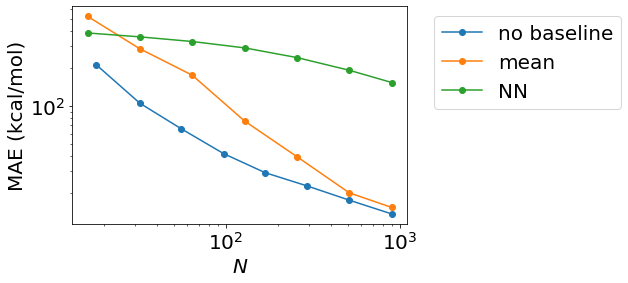

In [11]:
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(1,1)
ax.plot(cm_atomic[4:,0], cm_atomic[4:,1]*627, '-o', label = 'no baseline')
ax.plot(mean_en3[:,0], mean_en3[:,1]*627, '-o', label = 'mean')

ax.plot(nn[:,0], nn[:,1]*627, '-o', label = 'NN')
#ax.plot(mean_en2[:,0], mean_en2[:,1], '-o', label = 'mean')
#ax.plot(mean_en[:,0], mean_en[:,1], '-o', label = 'mean')
ax.set_xlabel(r'$N$')
ax.set_ylabel('MAE (kcal/mol)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05,1.0))

In [ ]:
nn

### Compare alchemical potential at $\lambda = 1$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#alchpot_ueg = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/performance_different_labels/cm_alchpot.txt')
#lam1_pyscf = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_alch_pot/only_lambda1/pyscf.txt')
#lam1_pyscf_mol = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_alch_pot/only_lambda1/pyscf_per_mol.txt')


alchpots_H_b2 = np.loadtxt('/home/misa/APDFT/prototyping/atomic_energies/results/analyse_learning/lcurves_alch_pot/best_alchpots_H_b2.txt')
H_lam1_pyscf = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_alch_pot/only_lambda1/alchpots_H_pyscf.txt')
H_lam1_cpmd = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_alch_pot/only_lambda1/alchpots_H_cpmd.txt')


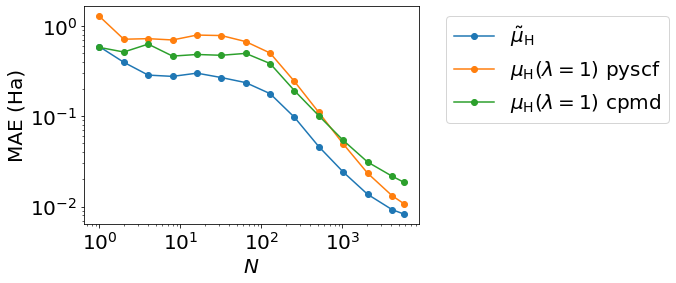

In [10]:
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(1,1)

#ax.plot(alchpot_ueg[:,0], alchpot_ueg[:,1], '-o')
#ax.plot(lam1_pyscf[:,0], lam1_pyscf[:,1], '-o')
#ax.plot(lam1_pyscf_mol[:,0], lam1_pyscf_mol[:,1], '-o')


ax.plot(alchpots_H_b2[:,0], alchpots_H_b2[:,1], '-o', label=r'$\tilde{\mu}_{\rm H}$')
ax.plot(H_lam1_pyscf[:,0], H_lam1_pyscf[:,1], '-o', label=r'$\mu_{\rm H} (\lambda = 1) $ pyscf')
ax.plot(H_lam1_cpmd[:,0], H_lam1_cpmd[:,1], '-o', label=r'$\mu_{\rm H} (\lambda = 1) $ cpmd')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'MAE (Ha)')
ax.legend(bbox_to_anchor = (1.05, 1))